# Figures for the thesis

Here I collect the extra figures that are generated purpusefully for the thesis and do not derive from other works. The figures are subdivided according to the chapters.  

When necessary, because of data or pre-existing code, some figures are generated with MATLAB (see /MATLAB/thesis_figures folder) or with Mathematica (notebook referenced point-wise)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
from scipy import stats 
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess

## Chapter 1

## Chapter 2

### Multistability

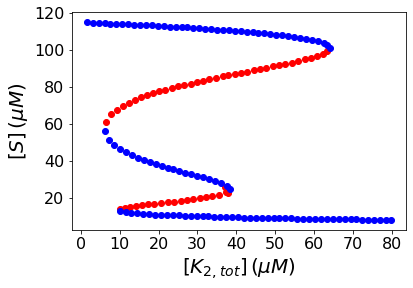

In [38]:
multi_stab = pd.read_csv('data/data_multistab_stab.csv',header=None)
multi_instab = pd.read_csv('data/data_multistab_instab.csv',header=None)

fig = plt.figure()
plt.scatter(multi_instab.loc[:,0],multi_instab.loc[:,1],color='red',marker='o')
plt.scatter(multi_stab.loc[:,0],multi_stab.loc[:,1],color='blue')
plt.xlabel('$[K_{2,tot}] \, (\\mu M)$',fontsize = 20)
plt.ylabel('$[S] \, (\\mu M)$',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

fig.savefig("figures/multistab3.pdf",bbox_inches = "tight",transparent=True)

## Chapter 3

### Data detrending
Figure illustrating data detrending. I use data from COVID-19 and follow a similar procedure to the paper "Performance of early warning signals for disease re-emergence" in order to show the different results obtained with different detrening methods.  
**Used detrending methods:** Gaussian, moving average, [ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html), [lowess](https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)

In [3]:
# Lux COVID-19 active cases from Ministry of Health website (https://covid19.public.lu/fr/graph.html)
Lux_covid_cases = [0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,2,15,24,21,0,33,122,158,143,175,127,21,242,193,170,263,196,127,44,171,112,191,129,117,71,39,77,87,80,71,48,12,19,3,76,50,44,55,19,8,31,48,18,20,32,15,6,12,33,16,14,7,12,4,12,11,9,11,6,9,2,7,10,12,7,9,13,2,12,12,9,1,9,2,1,2,6,7,4,4,2,1,1,4,4,5,2,4,1,6,3,7,3,4,8,2,6,10,3,7,9,17,0,15,3,13,20,44,32,13,53,29,54,53,30,55,15,58,61,59,44,65,83,31,100,66,163,124,84,112,35,86,129,98,104,146,83,48,39,157,82,78,98,62,9,53,92,66,40,56,36,11,26,58,64,36,34,19,11,30,67,71,67,58,27,14,35,90,62,46,48,52,4,29,57,71,48,53,56,10,18,54,78,81,45,51,9];
Lux_covid_df = pd.DataFrame(Lux_covid_cases)

Smoothing

In [4]:
# Moving average:
Lux_avg = Lux_covid_df.rolling(7, min_periods=1,center=False).mean()

# Gaussian:
Lux_gaus = Lux_covid_df.rolling(7, win_type='gaussian', min_periods=1,center=False).mean(std=2).round()

# lowess (using 1 week to estimate the nearest values)
frac = 7/len(Lux_covid_df)
Lux_lowess = pd.DataFrame(lowess(Lux_covid_df.values.flatten(), Lux_covid_df.index.values.flatten(), frac=frac)[:,1])

Residuals

In [5]:
# Mov avg
Lux_res_avg = Lux_covid_df - Lux_avg

# Gauss
Lux_res_gaus = Lux_covid_df - Lux_gaus

# lowess
Lux_res_lowess = Lux_covid_df - Lux_lowess

# ARIMA (directly from the pipeline on https://github.com/daniele-proverbio/EWS_epidemic)
Lux_res_arima = pd.read_excel('data/output215_LUX_1.xlsx')

Figure (example of detrending and of residuals)

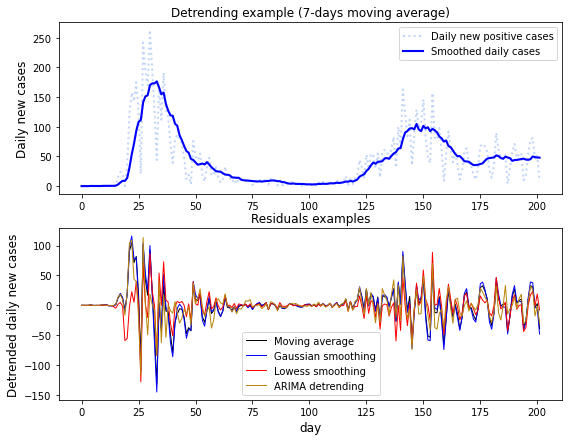

In [6]:
fig, ax = plt.subplots(2,figsize=(650/72,500/72))

#subfig 1 (detrending)


ax[0].set_title("Detrending example (7-days moving average)")
color = 'blue'
ax[0].set_ylabel('Daily new cases',fontsize=12)
ax[0].plot(Lux_covid_df.index.values,Lux_covid_df.values.flatten(),':',alpha=.4,linewidth=2,color="cornflowerblue",label="Daily new positive cases")
ax[0].plot(Lux_avg.index.values,Lux_avg.values.flatten(),'b',linewidth=2.1,label="Smoothed daily cases")
ax[0].legend()

#subfig 2 (residuals)
ax[1].set_title("Residuals examples")
ax[1].set_ylabel('Detrended daily new cases',fontsize=12)
ax[1].plot(Lux_res_avg.index.values,Lux_res_avg.values.flatten(),linewidth=1,color="black",label="Moving average")
ax[1].plot(Lux_res_gaus.index.values,Lux_res_gaus.values.flatten(),linewidth=1,color="blue",label="Gaussian smoothing")
ax[1].plot(Lux_res_lowess.index.values,Lux_res_lowess.values.flatten(),linewidth=1,color="red",label="Lowess smoothing")
ax[1].plot(Lux_res_arima.index.values[:len(Lux_res_lowess)],Lux_res_arima[0].values.flatten()[:len(Lux_res_lowess)],linewidth=1,color="darkgoldenrod",label="ARIMA detrending")
ax[1].legend()
ax[1].set_xlabel('day',fontsize=12)

fig.savefig("figures/smoothing_and_detrending.pdf",bbox_inches = "tight",transparent=True)


### Window centering

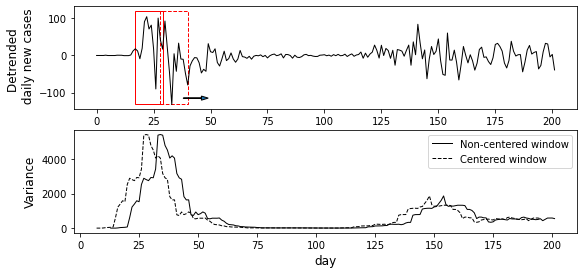

In [7]:
Lux_var_avg_F = Lux_res_avg.rolling(14,center=False).var()
Lux_var_avg_T = Lux_res_avg.rolling(14,center=True).var()


rect = Rectangle((17,-130), 12, 250, linewidth=1, edgecolor='r', facecolor='none')
rect1 = Rectangle((28,-130), 12, 250, linewidth=1, edgecolor='r', facecolor='none', linestyle = 'dashed')


fig, ax = plt.subplots(2,figsize=(650/72,300/72))
ax[0].plot(Lux_res_avg.index.values,Lux_res_avg.values.flatten(),linewidth=1,color="black",label="Moving average")
ax[0].set_ylabel('Detrended \n daily new cases',fontsize=12)
ax[0].add_patch(rect)
ax[0].add_patch(rect1)
ax[0].arrow(38,-115,8,0,head_width=11,head_length=3)

ax[1].plot(Lux_var_avg_F.index.values,Lux_var_avg_F.values.flatten(),linewidth=1,color="black",label="Non-centered window")
ax[1].plot(Lux_var_avg_T.index.values,Lux_var_avg_T.values.flatten(),'k--',linewidth=1,label="Centered window")
ax[1].legend()
ax[1].set_xlabel('day',fontsize=12)
ax[1].set_ylabel('Variance',fontsize=12)

fig.savefig("figures/window_centering.pdf",bbox_inches = "tight",transparent=True)


## Chapter 4

### Mathematical background
Illustrative reduction of diffferent models to normal forms

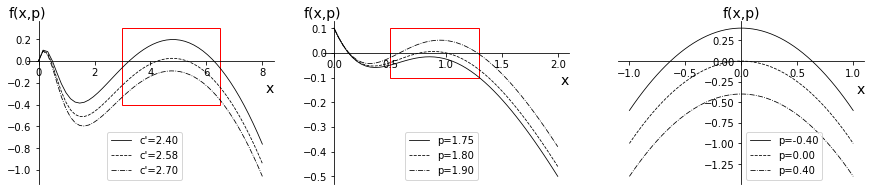

In [9]:
# Vector field

x = np.linspace(-1,1) #variable
xx = np.linspace(0,8) #variable
xxx = np.linspace(0,2) #variable

p_sn = [-0.4, 0, 0.4] # parameter for saddle-node
p_hp = [2.4, 2.58, 2.7] # parameter for harvested population
p_pp = [1.75, 1.8, 1.9] # parameter for protein production
K = 10 # other parameter for harvested
k = 0.1 # other parameter for protein

f_hp1 =  xx*(1-xx/K) - p_hp[0]*(xx**2)/(xx**2+1)
f_hp2 =  xx*(1-xx/K) - p_hp[1]*(xx**2)/(xx**2+1)
f_hp3 =  xx*(1-xx/K) - p_hp[2]*(xx**2)/(xx**2+1)

f_pp1 =  k + p_pp[0]*(xxx**2)/(1+xxx**2) - xxx
f_pp2 =  k + p_pp[1]*(xxx**2)/(1+xxx**2) - xxx
f_pp3 =  k + p_pp[2]*(xxx**2)/(1+xxx**2) - xxx

f_sn1 = -p_sn[0] - x**2
f_sn2 = -p_sn[1] - x**2
f_sn3 = -p_sn[2] - x**2

fig, ax = plt.subplots(1,3,figsize = (15,3))

ax[0].plot(xx, f_hp1,'-',color='black',label = 'c\'=%.2f' %p_hp[0],linewidth = 0.8 )
ax[0].plot(xx, f_hp2,'--',color='black',label = 'c\'=%.2f' %p_hp[1], linewidth = 0.8  )
ax[0].plot(xx, f_hp3,'-.',color='black',label = 'c\'=%.2f' %p_hp[2], linewidth = 0.8  )
ax[0].legend(bbox_to_anchor=(0.65, 0.35))
ax[0].yaxis.set_label_coords(0, 1)
ax[0].add_patch(Rectangle((3,-0.4),3.5,0.7,edgecolor='red',facecolor='none',lw=1))

ax[1].plot(xxx, f_pp1,'-',color='black',label = 'p=%.2f' %p_pp[0],linewidth = 0.8 )
ax[1].plot(xxx, f_pp2,'--',color='black',label = 'p=%.2f' %p_pp[1], linewidth = 0.8  )
ax[1].plot(xxx, f_pp3,'-.',color='black',label = 'p=%.2f' %p_pp[2], linewidth = 0.8  )
ax[1].legend(bbox_to_anchor=(0.65, 0.35))
ax[1].yaxis.set_label_coords(0, 1)
ax[1].add_patch(Rectangle((0.5,-0.1),0.8,0.2,edgecolor='red',facecolor='none',lw=1))

ax[2].plot(x, f_sn1,'-',color='black',label = 'p=%.2f' %p_sn[0],linewidth = 0.8 )
ax[2].plot(x, f_sn2,'--',color='black',label = 'p=%.2f' %p_sn[1], linewidth = 0.8  )
ax[2].plot(x, f_sn3,'-.',color='black',label = 'p=%.2f' %p_sn[2], linewidth = 0.8  )
ax[2].legend(bbox_to_anchor=(0.85, 0.35))
ax[2].yaxis.set_label_coords(0.5, 1)

for i in range(0,3):
    ax[i].set_xlabel('x',fontsize=14,loc="right")
    ax[i].set_ylabel('f(x,p)',fontsize=14,rotation=0)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['top'].set_color('none')

fig.savefig("figures/visual_examples.pdf",bbox_inches = "tight",transparent=True)

### ROC curve
With dummy values

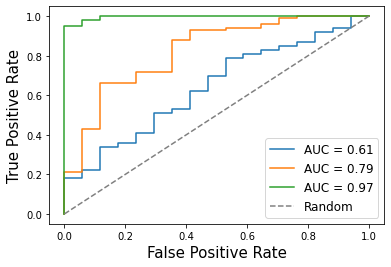

In [22]:
x = np.linspace(0,1,18)
y1 = [0, 0.18, 0.22, 0.34, 0.36, 0.41, 0.51, 0.53, 0.62, 0.7, 0.79, 0.81, 0.83, 0.85, 0.87, 0.92, 0.94, 1]
y2 = [0, 0.21, 0.43, 0.66, 0.66, 0.72, 0.72, 0.88, 0.93, 0.93, 0.94, 0.94, 0.96, 0.99, 1, 1, 1, 1]
y3 = [0,0.95,0.98,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y4 = x

area1 = trapz(y1, dx=(x[1]-x[0]))
area2 = trapz(y2, dx=(x[1]-x[0]))
area3 = trapz(y3, dx=(x[1]-x[0]))


fig = plt.figure()
plt.step(x,y1,label = 'AUC = %.2f' %area1)
plt.step(x,y2,label = 'AUC = %.2f' %area2)
plt.step(x,y3,label = 'AUC = %.2f' %area3)
plt.plot(x,y4,'--',color='grey', label = 'Random')
plt.legend(fontsize=12)
plt.ylabel("True Positive Rate",fontsize=15)
plt.xlabel("False Positive Rate",fontsize=15)

fig.savefig("figures/ROC.pdf",bbox_inches = "tight",transparent=True)

## Chapter 9

### EWS capabilities in real time

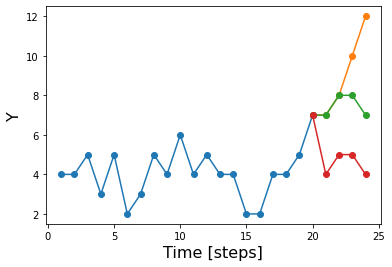

In [39]:
x = np.linspace(1,20,20)
y = [4,4,5,3,5,2,3,5,4,6,4,5,4,4,2,2,4,4,5,7]

x1 = [20,21,22,23,24]
y1 = [7,7,8,10,12]
y2 = [7,7,8,8,7]
y3 = [7,4,5,5,4]

fig = plt.figure()
plt.plot(x,y,'-o')
plt.plot(x1,y1,'-o')
plt.plot(x1,y2,'-o')
plt.plot(x1,y3,'-o')
plt.xlabel('Time [steps]',fontsize = 16)
plt.ylabel('Y',fontsize = 16)

fig.savefig("figures/dummy_ekf_ews.pdf",bbox_inches = "tight",transparent=True)

## Appendix A - Normal forms
Bifurcation diagrams are instead generated with Mathematica (normal_forms.nb)

### Fold

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = -p[0] -x**2
f_xp2 = -p[1] -x**2
f_xp3 = -p[2] -x**2

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.75, 0.75))
ax.set_xlabel('x',fontsize=14,loc="right")
ax.set_ylabel('f(x,p)',fontsize=14,loc="top",rotation=0)

ax.arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax.arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(-0.64,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(-0.64,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(0.49,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax.arrow(0.79,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-1.25,0.75)

#fig.savefig("figures/fold.pdf",bbox_inches = "tight",transparent=True)

### Transcritical

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = p[0]*x -x**2
f_xp2 = p[1]*x -x**2
f_xp3 = p[2]*x -x**2

fig, ax = plt.subplots(1,3)

ax[0].plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
ax[1].plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
ax[2].plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )

ax[0].legend(bbox_to_anchor=(0.75, 0.75))
ax.set_xlabel('x',fontsize=14,loc="right")
ax.set_ylabel('f(x,p)',fontsize=14,loc="top",rotation=0)

ax.arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax.arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(-0.64,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(-0.64,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax.arrow(0.49,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax.arrow(0.79,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

for i in range(0,3)
ax[i].spines['left'].set_position('zero')
ax[i].spines['right'].set_color('none')
ax[i].spines['bottom'].set_position('zero')
ax[i].spines['top'].set_color('none')
ax[i].xticks([-1, -0.5, 0, 0.5, 1])
ax[i].yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax[i].set_ylim(-1.25,0.75)

#fig.savefig("figures/fold.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Potential

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = p[0]*x +(x**3)/3
f_xp2 = p[1]*x +(x**3)/3
f_xp3 = p[2]*x +(x**3)/3

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.9, 0.3),fontsize=12)
ax.set_xlabel('x',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.75,0.75)

#fig.savefig("figures/fold_p.pdf",bbox_inches = "tight",transparent=True)

### Transcritical

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = p[0]*x -x**2
f_xp2 = p[1]*x -x**2
f_xp3 = p[2]*x -x**2

fig, ax = plt.subplots(1,3,figsize = (15,3))

ax[0].plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
ax[1].plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
ax[2].plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )

ax[0].arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[0].arrow(-0.15,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[0].arrow(-0.39,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[0].arrow(-0.39,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)

ax[1].arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[1].arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)

ax[2].arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[2].arrow(0,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[2].arrow(0.53,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[2].arrow(0.24,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

for i in range(0,3):
    ax[i].legend(bbox_to_anchor=(0.95, 0.95))
    ax[i].set_xlabel('x',fontsize=14,loc="right")
    ax[i].set_ylabel('f(x,p)',fontsize=14,loc="top",rotation=0)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['top'].set_color('none')
    ax[i].set_xticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
    ax[i].set_ylim(-1,0.5)

#fig.savefig("figures/trans_v.pdf",bbox_inches = "tight",transparent=True)

### Subcritical pitchfork

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = p[0]*x +x**3
f_xp2 = p[1]*x +x**3
f_xp3 = p[2]*x +x**3

fig, ax = plt.subplots(1,3,figsize = (15,3))

ax[0].plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
ax[1].plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
ax[2].plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )

ax[0].arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[0].arrow(-0.15,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[0].arrow(-0.64,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[0].arrow(-0.64,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[0].arrow(0.64,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[0].arrow(0.64,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)

ax[1].arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[1].arrow(-0.15,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

ax[2].arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[2].arrow(0,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)

for i in range(0,3):
    ax[i].legend(bbox_to_anchor=(0.95, 0.15))
    ax[i].set_xlabel('x',fontsize=14,loc="right")
    ax[i].set_ylabel('f(x,p)',fontsize=14,loc="top",rotation=0)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['top'].set_color('none')
    ax[i].set_xticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
    ax[i].set_ylim(-0.5,0.5)

#fig.savefig("figures/subpitch_v.pdf",bbox_inches = "tight",transparent=True)

### Global subcritical pitchfork

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.15, 0, 0.15, -0.35, -0.3, -0.25] # parameter

f_xp1 = p[0]*x + x**3 - x**5
f_xp2 = p[1]*x + x**3 - x**5
f_xp3 = p[2]*x + x**3 - x**5

f_xp4 = p[3]*x + x**3 - x**5
f_xp5 = p[4]*x + x**3 - x**5
f_xp6 = p[5]*x + x**3 - x**5

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )

plt.plot(x, f_xp4,'-',color='grey',linewidth = 0.4, alpha = 0.33  )
plt.plot(x, f_xp5,'-',color='grey', linewidth = 0.4 , alpha = 0.66 )
plt.plot(x, f_xp6,'-',color='grey', linewidth = 0.4, alpha = 1  )

ax.legend(bbox_to_anchor=(0.86, 0.31),fontsize=12)
ax.set_xlabel('x',fontsize=16,loc="right")
ax.set_ylabel('f(x,p)',fontsize=16,loc="top",rotation=0)

ax.arrow(0.15,0,-0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)
ax.arrow(-0.15,0,0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)
ax.arrow(-0.75,0,-0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)
ax.arrow(-1.05,0,0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)
ax.arrow(-0.45,0,-0.1,0,head_width=0.03,head_length=0.05,color='red',width=0.005)
ax.arrow(-0.45,0,0.1,0,head_width=0.03,head_length=0.05,color='red',width=0.005)
ax.arrow(0.45,0,-0.1,0,head_width=0.03,head_length=0.05,color='red',width=0.005)
ax.arrow(0.45,0,0.1,0,head_width=0.03,head_length=0.05,color='red',width=0.005)
ax.arrow(0.75,0,0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)
ax.arrow(1.05,0,-0.1,0,head_width=0.03,head_length=0.05,color='blue',width=0.005)

ax.arrow(-0.9,0.3,0,-0.05,head_width=0.02,head_length=0.01,color='grey',width=0.002)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.35,0.35)

fig.savefig("figures/subpitch_global_v.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Potential

x = np.linspace(-1.5,1.5) #variable

p = [-0.15, 0, 0.15] # parameter

f_xp1 = -(p[0]*(x**2) +(x**4)/4 - (x**6)/6)
f_xp2 = -(p[1]*(x**2) +(x**4)/4 - (x**6)/6)
f_xp3 = -(p[2]*(x**2) +(x**4)/4 - (x**6)/6)

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.84, 1),fontsize=12)
ax.set_xlabel('x',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.4,0.5)

fig.savefig("figures/subpitch_global_p.pdf",bbox_inches = "tight",transparent=True)

### Supercritical pitchfork

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = p[0]*x -x**3
f_xp2 = p[1]*x -x**3
f_xp3 = p[2]*x -x**3

fig, ax = plt.subplots(1,3,figsize = (15,3))

ax[0].plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
ax[1].plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
ax[2].plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )

ax[0].arrow(-0.15,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[0].arrow(0.15,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

ax[2].arrow(0,0,-0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[2].arrow(0,0,0.1,0,head_width=0.05,head_length=0.05,color='red',width=0.01)
ax[2].arrow(-0.79,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[2].arrow(-0.49,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[2].arrow(0.79,0,-0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)
ax[2].arrow(0.49,0,0.1,0,head_width=0.05,head_length=0.05,color='blue',width=0.01)

for i in range(0,3):
    ax[i].legend(bbox_to_anchor=(0.95, 0.15))
    ax[i].set_xlabel('x',fontsize=14,loc="right")
    ax[i].set_ylabel('f(x,p)',fontsize=14,loc="top",rotation=0)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['top'].set_color('none')
    ax[i].set_xticks([-1, -0.5, 0, 0.5, 1])
    ax[i].set_yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
    ax[i].set_ylim(-0.5,0.5)

fig.savefig("figures/superpitch_v.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Potential

x = np.linspace(-1.5,1.5) #variable

p = [-0.4, 0, 0.4] # parameter

f_xp1 = -(p[0]*(x**2) -(x**4)/4 )
f_xp2 = -(p[1]*(x**2) -(x**4)/4)
f_xp3 = -(p[2]*(x**2) -(x**4)/4)

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = 'p=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = 'p=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = 'p=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.84, 1),fontsize=12)
ax.set_xlabel('x',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.4,0.5)

fig.savefig("figures/superpitch_p.pdf",bbox_inches = "tight",transparent=True)

## Appendix C: catastrophe machine

### Bending parameter

In [ ]:
# Potential

x = np.linspace(-1.5,1.5) #variable

p = [0, 0.25, 0.5] # parameter

f_xp1 = -(p[0]*(x**2) -(x**4)/4 )
f_xp2 = -(p[1]*(x**2) -(x**4)/4)
f_xp3 = -(p[2]*(x**2) -(x**4)/4)

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = '$\\alpha$=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\alpha$=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\alpha$=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.8, 0.7),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.3,0.5)

fig.savefig("figures/cat_mac_p.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Vector field

x = np.linspace(-1,1) #variable

p = [0,0.25,0.5] # parameter

f_xp1 = 2*p[0]*x - 4*x**3
f_xp2 = 2*p[1]*x - 4*x**3
f_xp3 = 2*p[2]*x - 4*x**3

fig, ax = plt.subplots()
plt.plot(x, f_xp1,'-',color='black',label = '$\\alpha$=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\alpha$=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\alpha$=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.7, 0.7),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.3,0.5)

fig.savefig("figures/cat_mac_v.pdf",bbox_inches = "tight",transparent=True)

### Tilting parameter

In [ ]:
# Potential

x = np.linspace(-1.5,1.5) #variable

p = [0.2, 0.52, 0.7] # parameter

f_xp1 = (x**4) - (x**2) + p[0]*x
f_xp2 = (x**4) - (x**2) + p[1]*x
f_xp3 = (x**4) - (x**2) + p[2]*x

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = '$\\rho$=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\rho$=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\rho$=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.9, 0.35),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.8,0.5)

fig.savefig("figures/cat_mac_p_tilt.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Vector field

x = np.linspace(-1.5,1.5) #variable

p = [0.2, 0.52, 0.7] # parameter

f_xp1 = 4*(x**3) - 2*(x) + p[0]
f_xp2 = 4*(x**3) - 2*(x) + p[1]
f_xp3 = 4*(x**3) - 2*(x) + p[2]

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = '$\\rho$=%.2f' %p[0],linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\rho$=%.2f' %p[1], linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\rho$=%.2f' %p[2], linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.9, 0.35),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-1.5,1.5)

fig.savefig("figures/cat_mac_v_tilt.pdf",bbox_inches = "tight",transparent=True)

### Combinations

In [ ]:
# Potential

x = np.linspace(-1.5,1.5) #variable

p = [0.55, 0.3, 0.32] # corresponds to parameter rho
q = [0.35, 1, 0.8] # corresponds to parameter alpha

f_xp1 = (x**4) - q[0]*(x**2) + p[0]*x
f_xp2 = (x**4) - q[1]*(x**2) + p[1]*x
f_xp3 = (x**4) - q[2]*(x**2) + p[2]*x

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[0],p[0]),linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[1],p[1]), linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[2],p[2]), linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.95, 0.35),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.8,0.8)

fig.savefig("figures/cat_mac_p_comb.pdf",bbox_inches = "tight",transparent=True)

In [ ]:
# Vector field

x = np.linspace(-1.5,1.5) #variable

p = [0.55, 0.3, 0.32] # corresponds to parameter rho
q = [0.35, 1, 0.8] # corresponds to parameter alpha

f_xp1 = 4*(x**3) - 2*q[0]*(x) + p[0]
f_xp2 = 4*(x**3) - 2*q[1]*(x) + p[1]
f_xp3 = 4*(x**3) - 2*q[2]*(x) + p[2]

fig, ax = plt.subplots()

plt.plot(x, f_xp1,'-',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[0],p[0]),linewidth = 0.8 )
plt.plot(x, f_xp2,'--',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[1],p[1]), linewidth = 0.8  )
plt.plot(x, f_xp3,'-.',color='black',label = '$\\alpha$=%.2f; $\\rho$=%.2f' %(q[2],p[2]), linewidth = 0.8  )
ax.legend(bbox_to_anchor=(0.55, 0.25),fontsize=12)
ax.set_xlabel('$\\theta$',fontsize=16,loc="right")
ax.set_ylabel('V(x,p)',fontsize=16,loc="top",rotation=0)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xticks([-1, -0.5, 0, 0.5, 1])
yticks([-1.25, -0.75, -0.25, 0.25, 0.75])
ax.set_ylim(-0.8,1.2)

fig.savefig("figures/cat_mac_v_comb.pdf",bbox_inches = "tight",transparent=True)